In [1]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Pasta atual do projeto
current_folder = os.getcwd()

# Diretório dos dados
DATA_DIR = os.path.join(current_folder, "data")

# Cria o diretório se não existir
os.makedirs(DATA_DIR, exist_ok=True)

# Verifica se o diretório de dados está vazio
if not os.listdir(DATA_DIR):
    print("Diretório está vazio. Baixando dataset...")

    # Inicializa e autentica na API do Kaggle
    api = KaggleApi()
    api.authenticate()

    # Faz o download e extrai arquivos
    api.dataset_download_files('uciml/adult-census-income',  # nome do dataset desejado
        path=DATA_DIR,
        unzip=True
    )

    print("Download concluído com sucesso!")
else:
    print("Diretório já contém arquivos. Nenhuma ação necessária.")

Diretório já contém arquivos. Nenhuma ação necessária.


In [2]:
# importar os pacotes necessários
from ast import ImportFrom
import pandas as pd

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
import pdb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, RepeatedKFold

from sklearn.linear_model import LogisticRegression

from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import RandomizedSearchCV
from utils.eda import *
from utils.feature_engineering import *
#teste
#teste
# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

# indice

- [1 Carregando o dataframe](#1-carregando-o-dataframe)
- [2 Analise Exploratoria](#2-analise-exploratoria)
    - [2.1 Variavel target](#2.1-variavel-target)
    - [2.2 Variavel age](#2.2-variavel-age)
    - [2.3 Variavel fnlwgt](#2.3-variavel-fnlwgt)
    - [2.4 Variavel education](#2.4-variavel-education)
    - [2.5 Variavel relationship](#2.5-variavel-relationship)
    - [2.6 Variavel race](#2.6-variavel-race)
    - [2.7 Variavel sex](#2.7-variavel-sex)
    - [2.8 Variavel capital-gain](#2.8-variavel-capital-gain)
    - [2.9 Variavel capital-loss](#2.9-variavel-capital-loss)
    - [2.10 Variavel hours-per-week](#2.10-variavel-hours-per-week)
    - [2.11 Variavel native-country](#2.11-variavel-native-country)
    - [2.12 Relacionamento entre as variaveis ](#2.12-relacionamento-entre-as-variaveis)
        - [2.12.1 relacionamento entre as variaveis sex-race-income-e-numericas](#2121-relacionamento-entre-as-variaveis-sex-race-income-e-numericas)
        - [2.12.2 relacionamento entre as variaveis workclass-occupation-class-e-outras-numericas](#2122-relacionamento-entre-as-variaveis-workclass-occupation-class-e-outras-numericas)
- [3.0 Engenharia de Atributos](#30-engenharia-de-atributos)
    - [3.1 Variaveis Categoricas](#31-variaveis-categoricas)
    - [3.2 Variaveis Numericas](#32-variaveis-numericas)
- [4.0 Correlacao entre as variaveis ](#4.0-Correlacao-entre-as-variaveis )


## 1 Carregando o dataframe

* Carregando o dataframe de treino . Posteriormente iremos carregar o dataset de teste

    1. age: continuous.
    2. workincome: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    3. fnlwgt: continuous.
    4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    5. education-num: continuous.
    6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, **    Protective-serv, Armed-Forces.
    8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    10. sex: Female, Male.
    11. capital-gain: continuous.
    12. capital-loss: continuous.
    13. hours-per-week: continuous.
    14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland,   Jamaica,  Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&   Tobago, Peru,  Hong, Holand-Netherlands.
    15. income: >50K, <=50K.

[↩️ Retornar ao índice](#indice)


In [3]:
##Carregando os datasets de treino na fonte de dados
treino_path='C:/Users/Sergio/OneDrive/FIAP/Tech_Challenge_Fase_3/data/adult.csv'
df_treino=pd.read_csv(treino_path, names=['age', 'workincome', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'], header=None, index_col=False,
    skiprows=1)
pd.set_option('display.max_columns', 500)
display(df_treino)

,age,workincome,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
#Imprimindo as 5 primeiras linhas
df_treino.head()

,age,workincome,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
#Imprimindo as 5 últimas linhas
df_treino.tail()

,age,workincome,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
#Imprimindo a quantidade de dados e variáveis
print("Quantidade de dados: ", df_treino.shape[0])
print("Quantidade de variáveis: ", df_treino.shape[1])

Quantidade de dados:  32561
Quantidade de variáveis:  15


## 2 Analise Exploratoria

Antes de aplicarmos os modelos de machine learning, vamos realizar uma analise exploratoria dos dados para avaliar a necessidade de alguma alteração.
primeiramente, verificaremos quantos dados e variaveis possuem no dataset de treino

>* Tamanho do dataset: 32561 dados de entrada
>* Total de colunas: 15 colunas
>* Total de variaveis: 15 variaveis
>* Variavel target: A variavel target(income) , define se uma pessoa faz abaixo de $50K por ano ou se excede  esse valor baseado nos dados 

* Cada dado de entrada representa uma pessoa consultada
>__Tipo das variveis__
* Variavel Numerica(6 variaveis, int64): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week
* Variavel Categorica(9 , object(str)): workincome, education, marital-status, occupation, relationship, race, sex, native-country, income

>__Valores Nulos__
* Não possuimos valores nulos em nenhuma das colunas



[↩️ Retornar ao índice](#indice)

In [7]:
import pandas as pd

# Supondo que o dataframe original se chame 'df'
# Converta as variáveis numéricas para int64:
numeric_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df_treino[numeric_vars] = df_treino[numeric_vars].apply(pd.to_numeric, errors='coerce').astype('Int64')

# Converta as variáveis categóricas para object (string):
categorical_vars = ['workincome', 'education', 'marital-status', 
                    'occupation', 'relationship', 'race', 
                    'sex', 'native-country', 'income']

df_treino[categorical_vars] = df_treino[categorical_vars].astype(str)

Criaremos uma função para auxiliar a compreensão de forma mais especifica cada variavel que compõe o dataset de treino

In [8]:
#Armazenando as features
features = df_treino.columns.to_list()

#Armazenando as informações das variáveis
df_var = Map_Var_DF(features = features, df = df_treino)

#Imprimindo o dataframe
df_var

,feature,Tipo,Categórico,Binário,Qtd var unico,Min,Max,% Qtd de Nulos
0,age,Int64,0,0,73,17,90,0.0
1,workincome,object,1,0,9,N/A,N/A,0.0
2,fnlwgt,Int64,0,0,21648,12285,1484705,0.0
3,education,object,1,0,16,N/A,N/A,0.0
4,education-num,Int64,0,0,16,1,16,0.0
5,marital-status,object,1,0,7,N/A,N/A,0.0
6,occupation,object,1,0,15,N/A,N/A,0.0
7,relationship,object,1,0,6,N/A,N/A,0.0
8,race,object,1,0,5,N/A,N/A,0.0
9,sex,object,1,1,2,N/A,N/A,0.0


In [9]:
descricao_dataset(df_treino)

Quantidade de dados:  (32561, 15)

Quantidade de variáveis: Index(['age', 'workincome', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Dataframe primeira ate a ultima linha:



,age,workincome,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K



Descrição das Colunas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  Int64 
 1   workincome      32561 non-null  object
 2   fnlwgt          32561 non-null  Int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  Int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  Int64 
 11  capital-loss    32561 non-null  Int64 
 12  hours-per-week  32561 non-null  Int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: Int64(6), object(9)
memory usage: 3.9+ MB


None

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.0,32561.0,32561.0,32561.0,32561.0,32561.0
mean,38.581647,189778.366512,10.080679,1077.648844,87.30383,40.437456
std,13.640433,105549.977697,2.57272,7385.292085,402.960219,12.347429
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117827.0,9.0,0.0,0.0,40.0
50%,37.0,178356.0,10.0,0.0,0.0,40.0
75%,48.0,237051.0,12.0,0.0,0.0,45.0
max,90.0,1484705.0,16.0,99999.0,4356.0,99.0



Valores Nulos:



age               0
workincome        0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### 2.1 Variavel target 

>É definida se a pessoa ganham  que $50K por ano (income >50K) ou não (income <50K)

* Variável target categorica com 2 classes
* Sem valores ausentes ou nulos 
* Valores dos dados desbalanceados, onde 76% (24720) das pessoas ganham menos ou igual a $50K por ano , e 34%(7841) das pessoas ganham $50K por ano.
* Realizaremos um tratamento para tratar o desbalanceamento da classe.

[↩️ Retornar ao índice](#indice)

valores dos dados pela classe de variavel  income:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Percentagem dos dados pela classe de variavel income:
income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

Valores unicos da variavel income:
['<=50K' '>50K']



[Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')]

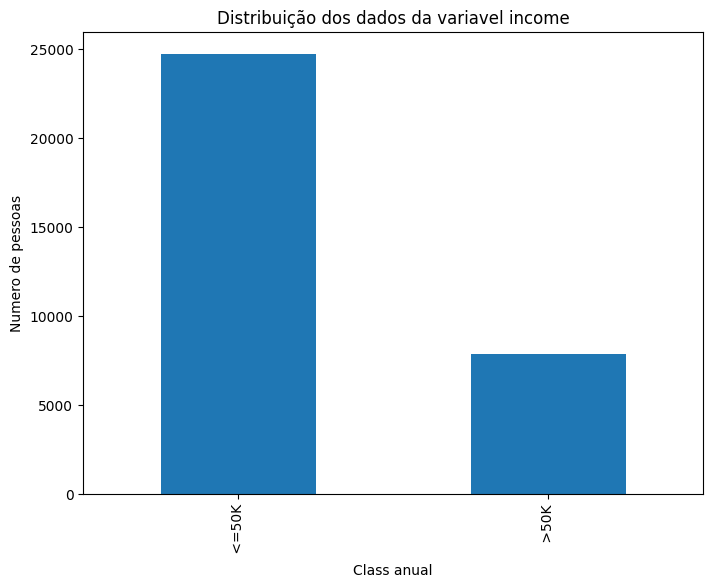

In [10]:
variavel='income'
analise_variavel_categorica(df_treino, variavel)

##plot de distribuição
ax=df_treino[variavel].value_counts().plot.bar()
ax.set_title('Distribuição dos dados da variavel '+variavel)
ax.set_ylabel('Numero de pessoas')
ax.set_xlabel('Class anual')
ax.set_xticklabels(labels=[' <=50K', ' >50K'])

### 2.2 Variavel age

>Distribuição dos valores de dados

__count__: 32561\
__null__: 0\
__mean__: 38.58 anos\
__std:__ 13.64 anos\
__min:__ 17 anos\
__25%:__ 28 anos\
__50%:__ 37 anos\
__75%:__ 48 anos\
__max:__ 90 anos



* Variável numerica com os valores de idade entre 17 ate 90 anos 
* Sem valores ausentes ou nulos 
* Grande concentração de pessoas com a idade entre 20 e 48 anos 
* Valores da idade apresentam media de 38.58 anos e mediana de 37 anos
* 25% das pessoas esta com 28 anos de idade e 75 % das pessoas possuem menos de 48 anos de idade
* Em relação a ao relacionamento entre a variação ano e class, nos notamos que pessoas mais velhas tendem a ganhar mais que $50K por ano, enquanto pessoas mais novas tendem a ganhar menos que $50K por ano 
* Entretanto, observando o boxplot percebemos uma area de intersecção entre as pessoas mais novas com as velhas , e vice e versa. relatando a relevancia de outras variaveis para determinar a class.


[↩️ Retornar ao índice](#indice)

valores dos dados pela classe de variavel  age:
age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: Int64

Percentagem dos dados pela classe de variavel age:
age
36    0.027579
31    0.027272
34     0.02721
23    0.026934
35    0.026903
        ...   
83    0.000184
88    0.000092
85    0.000092
86    0.000031
87    0.000031
Name: proportion, Length: 73, dtype: Float64

Valores unicos da variavel age:
<IntegerArray>
[90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37, 29, 61,
 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40, 50, 42, 39, 55,
 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81, 65, 25, 28, 56, 69, 20,
 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79, 88, 84, 85, 86, 87]
Length: 73, dtype: Int64



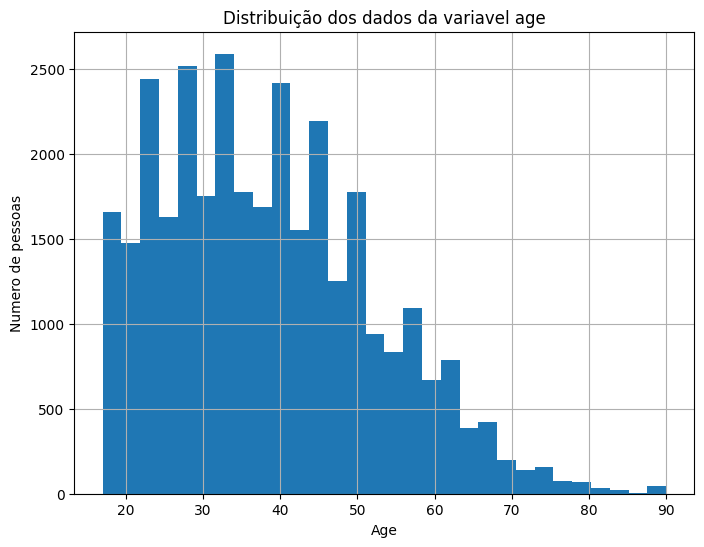

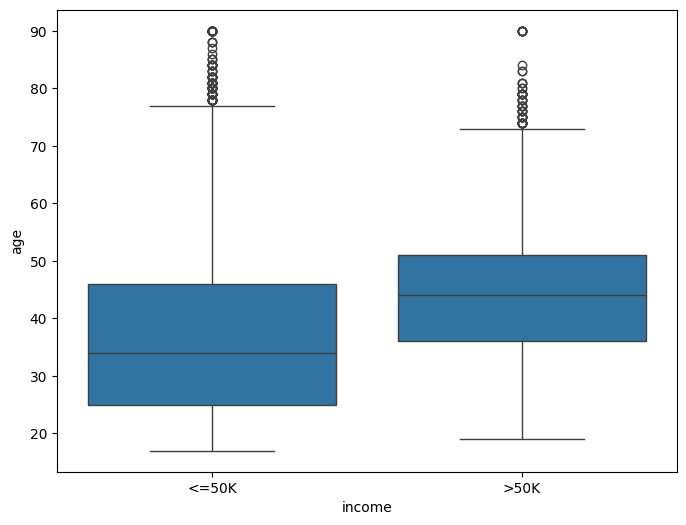

In [11]:
variavel='age'
analise_variavel_categorica(df_treino, variavel)


ax=df_treino[variavel].hist(bins=30)
ax.set_title('Distribuição dos dados da variavel '+variavel)
ax.set_ylabel('Numero de pessoas')
ax.set_xlabel('Age')
plt.show()

sns.boxplot(y='age' , x='income' , data=df_treino)
plt.show()

### 2.3 Variavel fnlwgt

> Essa variavel representa um peso estimativo para cada pesso conforme o Census. O peso demonstra que as duas amostras são similares, eles tambem apresentam caractetisticas similates


* Variavel numerica com larga escalas de valores, aparentemente sendo um valor distinto para cada pessoa
* Sem valores ausentes ou nulos 
* Em relação ao relacionamento entre a variavel fnlwgt e a class, noa observamos que ambas as classes da variavel classe apresentam distribuição com pouca diferença notavel
* É possivel notar a presença de outlier em ambas as classes


[↩️ Retornar ao índice](#indice)

valores dos dados pela classe de variavel  fnlwgt:
fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
136204     1
172274     1
70037      1
422013     1
216864     1
Name: count, Length: 21648, dtype: Int64

Percentagem dos dados pela classe de variavel fnlwgt:
fnlwgt
164190    0.000399
203488    0.000399
123011    0.000399
148995    0.000369
121124    0.000369
            ...   
136204    0.000031
172274    0.000031
70037     0.000031
422013    0.000031
216864    0.000031
Name: proportion, Length: 21648, dtype: Float64

Valores unicos da variavel fnlwgt:
<IntegerArray>
[ 77053, 132870, 186061, 140359, 264663, 216864, 150601,  88638, 422013,
  70037,
 ...
 179137, 325033, 345898, 287372, 252208, 129912, 255835,  34066,  84661,
 257302]
Length: 21648, dtype: Int64



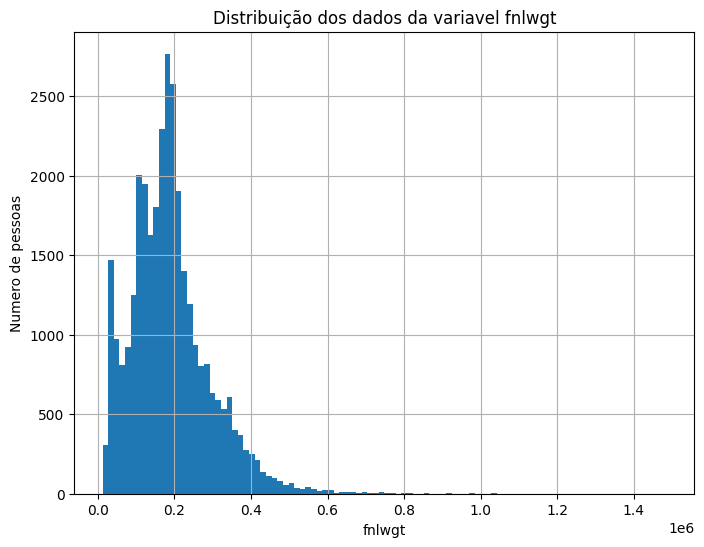

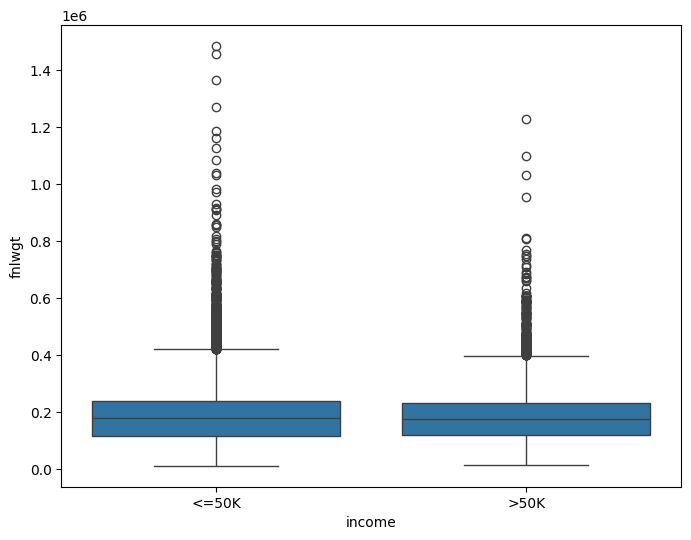

In [12]:

variavel='fnlwgt'
analise_variavel_categorica(df_treino, variavel)


ax=df_treino[variavel].hist(bins=100)
ax.set_title('Distribuição dos dados da variavel '+variavel)
ax.set_ylabel('Numero de pessoas')
ax.set_xlabel('fnlwgt')
plt.show()

sns.boxplot(y='fnlwgt' , x='income' , data=df_treino)
plt.show()

### 2.4 Variavel education


* Variavel categorica com 16 categorias distintas de educação
* Sem valores ausentes ou nulos 
* Valores dos dados desbalanceados, onde 32.3% (10501) das pessoas possuem hig school graduation(HS-grad), seguido por 22.4%(7291) das pessoas que possuem college degree, e 16.4% das pessoas possuem bachelor's degree
* Notamos que algumas classes apresentam os mesmos significados de education degree. HS-grad e 9th são relatadas como high school graduation. Seguindo esse raciocinio algumas classes poderão ser agrupadas
* Dos 5,14% das pessoas que possuem HS-grad 32,3% ganham mais que $50K por ano
* Dos 6,82% das pessoas que possuem bachelors degree 22,4% ganham mais que $50K por ano
* Dos 0,94% das pessoas que possuem doctorate degree 1,27% ganham mais que $50K por ano
* É possivel observar que pessoas que possuem um nivel de escolaridade mais elevada( masters e doctorate) tendem a ganhar mais que 50K por ano quando comparada com outras classes

[↩️ Retornar ao índice](#indice)

Distribuição de dados da variavel  education:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Porcentagem da distribuição dos dados da variavel  education:
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: proportion, dtype: float64

Total de valores unicos da variavel education: 16



count       32561
unique         16
top       HS-grad
freq        10501
Name: education, dtype: object

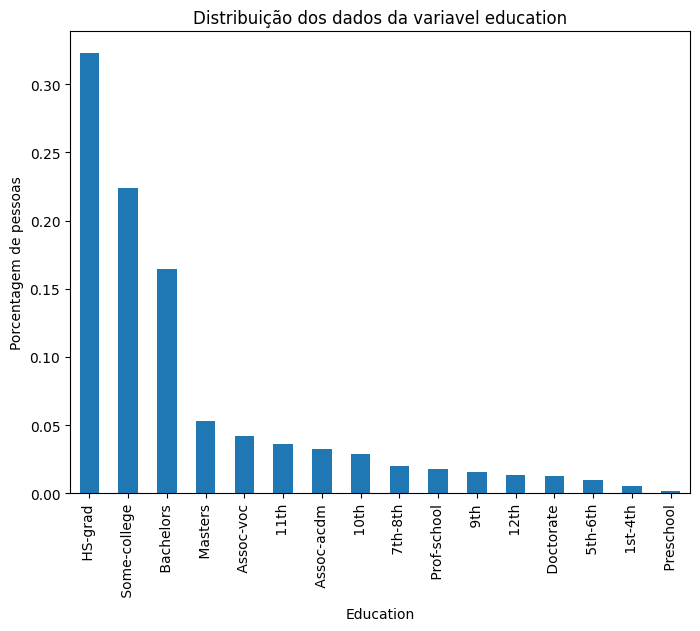

Porcentagem de pessoas com  HS-grad that makes >$50K/yr:  0.0
Porcentagem de pessoas com college degree que fazem >$50K/yr:  0.0
Porcentagem de pessoas com bachelors que fazem  >$50K/yr:  0.0
Porcentagem de pessoas com doctorate degree que fazem  >$50K/yr:  0.0


income,<=50K,>50K
education,,
10th,0.933548,0.066452
11th,0.948936,0.051064
12th,0.923788,0.076212
1st-4th,0.964286,0.035714
5th-6th,0.951952,0.048048
7th-8th,0.938080,0.061920
9th,0.947471,0.052529
Assoc-acdm,0.751640,0.248360
Assoc-voc,0.738784,0.261216


Text(0, 0.5, 'Porcentagem de pessoas  (Normalizado pela income)')

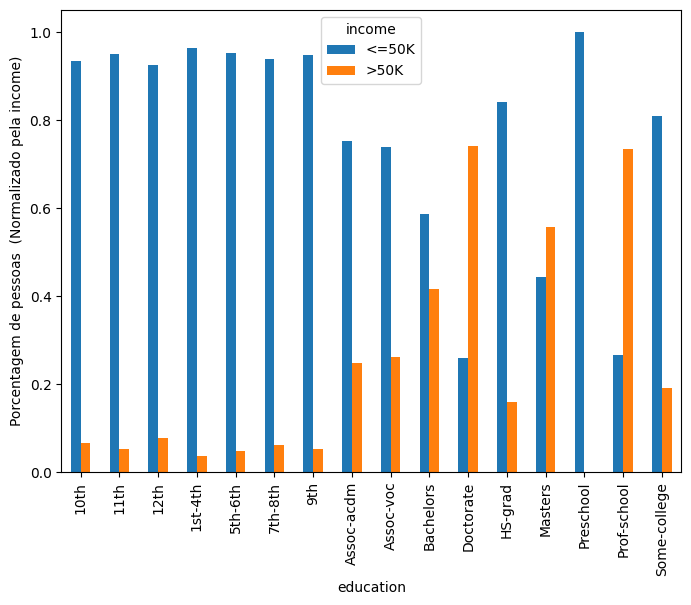

In [13]:
variavel='education'
analise_variavel_continua(df_treino, variavel)

##Plot da distribuição
ax=df_treino[variavel].value_counts(normalize=True).plot.bar()
ax.set_title('Distribuição dos dados da variavel '+variavel)
ax.set_ylabel('Porcentagem de pessoas')
ax.set_xlabel('Education')
ax.set_xticklabels(labels=[' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc', ' 11th', ' Assoc-acdm', ' 10th', ' 7th-8th', ' Prof-school', ' 9th', ' 12th', ' Doctorate', ' 5th-6th', ' 1st-4th', ' Preschool'])
plt.show()

print('Porcentagem de pessoas com  HS-grad that makes >$50K/yr: ', len(df_treino[(df_treino['education']==' HS-grad') & (df_treino['income']==' >50K')])/len(df_treino)*100)
print('Porcentagem de pessoas com college degree que fazem >$50K/yr: ', len(df_treino[(df_treino['education']==' Some-college') & (df_treino['income']==' >50K')])/len(df_treino)*100)
print('Porcentagem de pessoas com bachelors que fazem  >$50K/yr: ', len(df_treino[(df_treino['education']==' Bachelors') & (df_treino['income']==' >50K')])/len(df_treino)*100)
print('Porcentagem de pessoas com doctorate degree que fazem  >$50K/yr: ', len(df_treino[(df_treino['education']==' Doctorate') & (df_treino['income']==' >50K')])/len(df_treino)*100)

display(pd.crosstab([df_treino['education']], df_treino['income'], normalize='index'))

pd.crosstab([df_treino['education']], df_treino['income'], normalize='index').plot.bar()
plt.ylabel('Porcentagem de pessoas  (Normalizado pela income)')

### 2.5 Variavel relationship


* Variavel categorica com 6 classes  distintas de relationship
* Sem valores ausentes ou nulos 
* Valores dos dados desbalanceados, onde 40.5% (13193) das pessoas são maridos , enquanto 4.8%(1568) são esposas
* Contudo , notamos que independendo de ser marido ou esposa ambos são capazes de obter ganhar mais que 50K quando comparado com outras categorias

[↩️ Retornar ao índice](#indice)

Distribuição de dados da variavel  relationship:
relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

Porcentagem da distribuição dos dados da variavel  relationship:
relationship
Husband           0.405178
Not-in-family     0.255060
Own-child         0.155646
Unmarried         0.105832
Wife              0.048156
Other-relative    0.030128
Name: proportion, dtype: float64

Total de valores unicos da variavel relationship: 6



count       32561
unique          6
top       Husband
freq        13193
Name: relationship, dtype: object

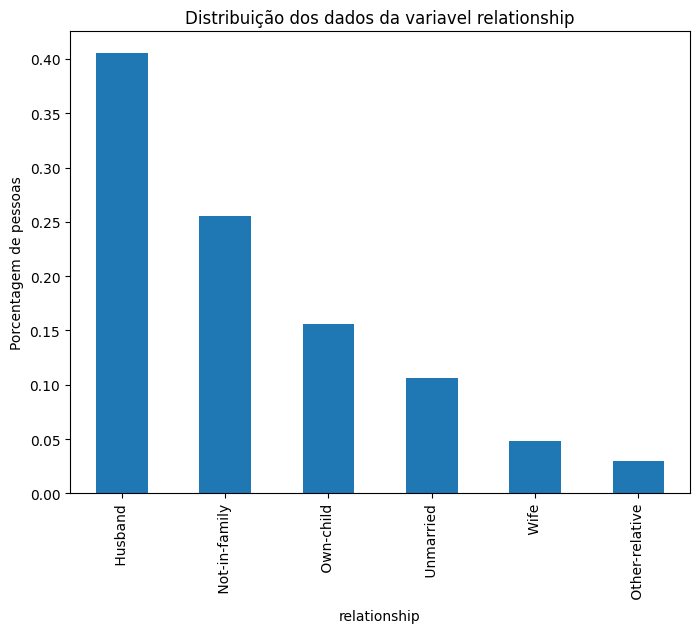

income,<=50K,>50K
relationship,,
Husband,0.551429,0.448571
Not-in-family,0.896930,0.103070
Other-relative,0.962283,0.037717
Own-child,0.986780,0.013220
Unmarried,0.936738,0.063262
Wife,0.524872,0.475128


Text(0, 0.5, 'Porcentagem de pessoas  (Normalizado pela income)')

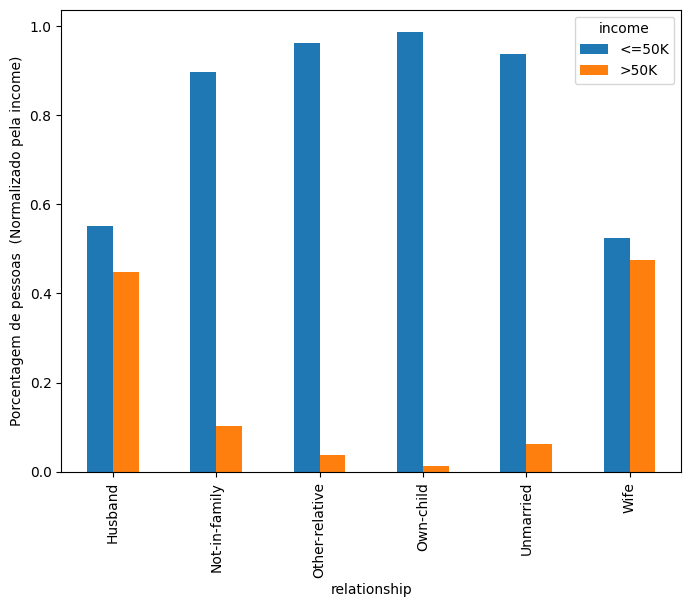

In [14]:
variavel='relationship'
analise_variavel_continua(df_treino, variavel)

##Plot da distribuição
ax=df_treino[variavel].value_counts(normalize=True).plot.bar()
ax.set_title('Distribuição dos dados da variavel '+variavel)
ax.set_ylabel('Porcentagem de pessoas')
ax.set_xlabel('relationship')
ax.set_xticklabels(labels=[' Husband', ' Not-in-family', ' Own-child', ' Unmarried', ' Wife', ' Other-relative'])
plt.show()

display(pd.crosstab([df_treino['relationship']], df_treino['income'], normalize='index'))

pd.crosstab([df_treino['relationship']], df_treino['income'], normalize='index').plot.bar()
plt.ylabel('Porcentagem de pessoas  (Normalizado pela income)')

### 2.6 Variavel race


* Variavel categorica com 5 categorias de raça  
* Sem valores ausentes ou nulos 
* Valores dos dados desbalanceados, onde 85,4% (27816) das pessoas são brancos , enquanto 9.6%(3124)  das pessoas são negras.

[↩️ Retornar ao índice](#indice)

valores dos dados pela classe de variavel  race:
race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

Percentagem dos dados pela classe de variavel race:
race
White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: proportion, dtype: float64

Valores unicos da variavel race:
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']



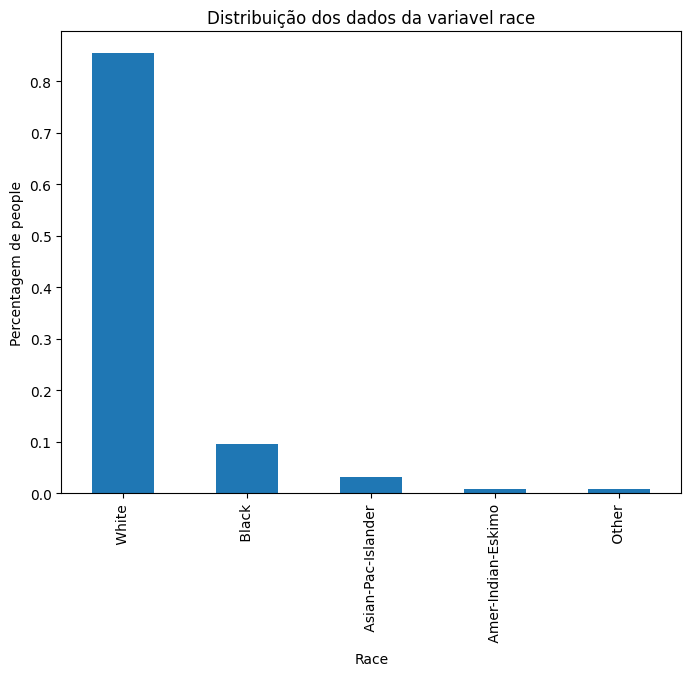

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.884244,0.115756
Asian-Pac-Islander,0.734360,0.265640
Black,0.876120,0.123880
Other,0.907749,0.092251
White,0.744140,0.255860


Text(0, 0.5, 'Porcentagem de pessoas  (normalizado pela income)')

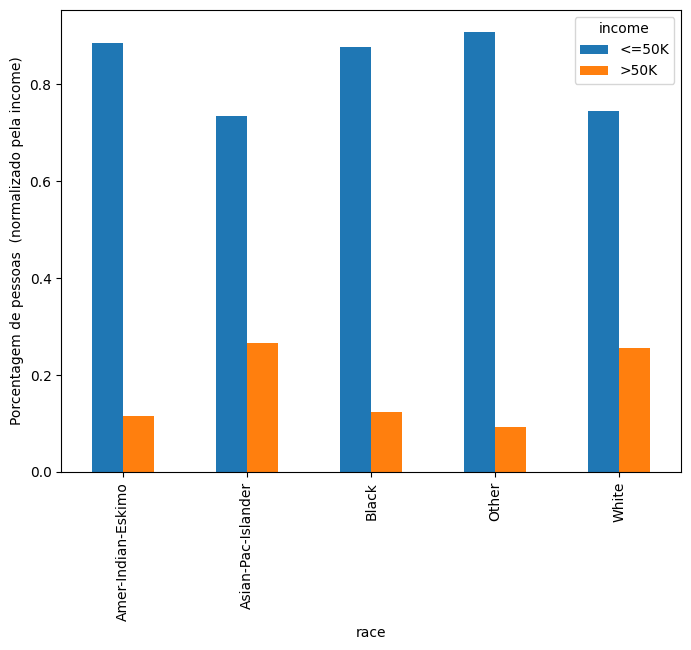

In [15]:
variavel='race'
analise_variavel_categorica(df_treino, variavel)

##plot distribution
ax=df_treino[variavel].value_counts(normalize=True).plot.bar()
ax.set_title('Distribuição dos dados da variavel '+variavel)
ax.set_ylabel('Percentagem de people')
ax.set_xlabel('Race')
ax.set_xticklabels(labels=[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'])
plt.show()

display(pd.crosstab([df_treino['race']], df_treino['income'], normalize='index'))

pd.crosstab([df_treino['race']], df_treino['income'], normalize='index').plot.bar()
plt.ylabel('Porcentagem de pessoas  (normalizado pela income)')

### 2.7 Variavel sex


* Variavel categorica com 2 classes distintas  
* Sem valores ausentes ou nulos 
* Valores dos dados desbalanceados, onde 66,9% (21790) das pessoas são do sexo masculino , enquanto 33.1%(10771)  das pessoas são do sexo feminino.
* Devido o elevado numero do sexo masculino comparado com o feminino, observamos que o sexo masculino possui maior ganho anual $50K por ano 

[↩️ Retornar ao índice](#indice)

valores dos dados pela classe de variavel  sex:
sex
Male      21790
Female    10771
Name: count, dtype: int64

Percentagem dos dados pela classe de variavel sex:
sex
Male      0.669205
Female    0.330795
Name: proportion, dtype: float64

Valores unicos da variavel sex:
['Female' 'Male']



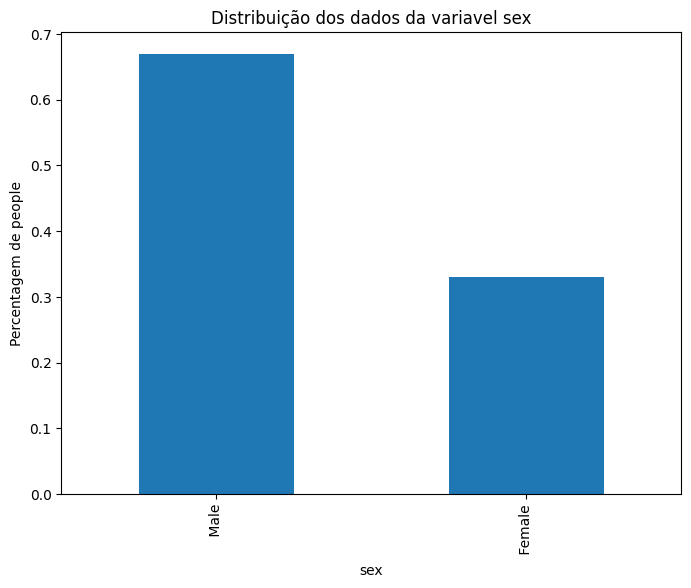

income,<=50K,>50K
sex,,
Female,0.890539,0.109461
Male,0.694263,0.305737


Text(0, 0.5, 'Porcentagem de pessoas  (normalizado pela income)')

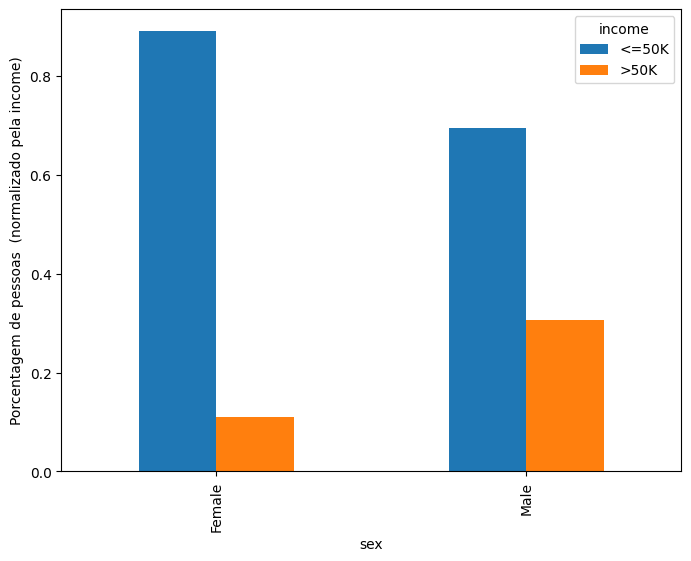

In [16]:
variavel='sex'
analise_variavel_categorica(df_treino, variavel)

##Plot de distribuição
ax=df_treino[variavel].value_counts(normalize=True).plot.bar()
ax.set_title('Distribuição dos dados da variavel '+variavel)
ax.set_ylabel('Percentagem de people')
ax.set_xlabel('sex')
ax.set_xticklabels(labels=[' Male', ' Female'])
plt.show()

display(pd.crosstab([df_treino['sex']], df_treino['income'], normalize='index'))

pd.crosstab([df_treino['sex']], df_treino['income'], normalize='index').plot.bar()
plt.ylabel('Porcentagem de pessoas  (normalizado pela income)')

### 2.8 Variavel capital-gain

> Faz referencia ao aumento de capital 

__count:__ 32561\
__null:__ 0\
__mean:__ $1077.65\
__std:__ $7385.29\
__min:__ $0\
__25%:__ $0\
__50%:__ $0\
__75%:__ $0\
__max:__ $99999


* Variavel numerica com outliers
* Sem valores ausentes ou nulos 
* Em relação ao relacionamento entre o capital gain e a class, notamos que o boxplot de ambas classes em relação com a variavel target não apresenta diferenças notaveis.
* Ambos os boxplots aprensentam outliers para essa varaivel 

[↩️ Retornar ao índice](#indice)

Distribuição de dados da variavel  capital-gain:
capital-gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
2538         1
2387         1
1455         1
1639         1
1111         1
Name: count, Length: 119, dtype: Int64

Porcentagem da distribuição dos dados da variavel  capital-gain:
capital-gain
0         0.91671
15024    0.010657
7688     0.008722
7298     0.007555
99999    0.004883
           ...   
2538     0.000031
2387     0.000031
1455     0.000031
1639     0.000031
1111     0.000031
Name: proportion, Length: 119, dtype: Float64

Total de valores unicos da variavel capital-gain: 119



count        32561.0
mean     1077.648844
std      7385.292085
min              0.0
25%              0.0
50%              0.0
75%              0.0
max          99999.0
Name: capital-gain, dtype: Float64

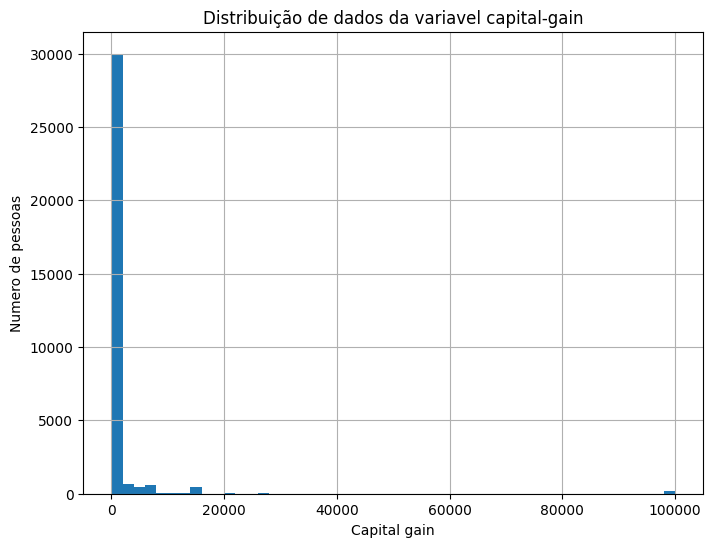

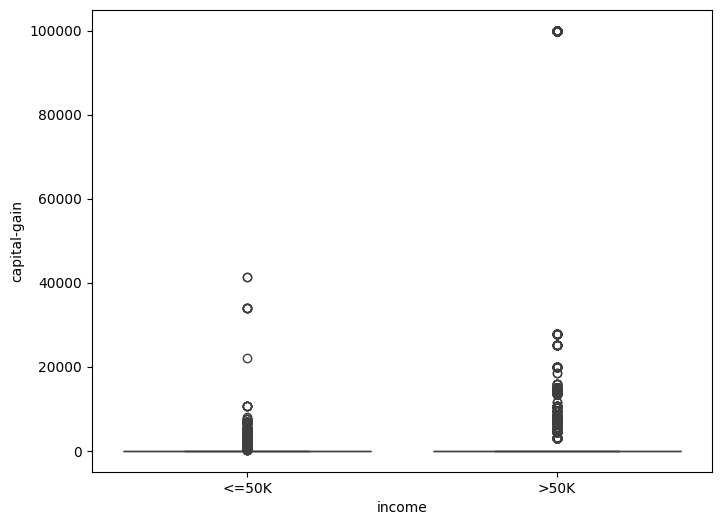

In [17]:

variavel='capital-gain'
analise_variavel_continua(df_treino, variavel)

ax=df_treino[variavel].hist(bins=50)
ax.set_title('Distribuição de dados da variavel '+variavel)
ax.set_ylabel('Numero de pessoas')
ax.set_xlabel('Capital gain')
plt.show()

sns.boxplot(y='capital-gain', x='income', data=df_treino)
plt.show()

### 2.9 Variavel capital-loss
> Faz referência a perda de capital 

__count:__ 32561\
__null:__ 0\
__mean:__ $87.30\
__std:__ $402.96\
__min:__ $0\
__25%:__ $0\
__50%:__ $0\
__75%:__ $0\
__max:__ $4356


* Variável numerica com outliers
* Sem valores ausentes ou nulos 
* Avaliação semelhante a variável capital-gain 

[↩️ Retornar ao índice](#indice)

Distribuição de dados da variavel  capital-loss:
capital-loss
0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1944        1
2080        1
1539        1
1411        1
155         1
Name: count, Length: 92, dtype: Int64

Porcentagem da distribuição dos dados da variavel  capital-loss:
capital-loss
0       0.953349
1902    0.006204
1977     0.00516
1887    0.004883
1848    0.001566
          ...   
1944    0.000031
2080    0.000031
1539    0.000031
1411    0.000031
155     0.000031
Name: proportion, Length: 92, dtype: Float64

Total de valores unicos da variavel capital-loss: 92



count       32561.0
mean       87.30383
std      402.960219
min             0.0
25%             0.0
50%             0.0
75%             0.0
max          4356.0
Name: capital-loss, dtype: Float64

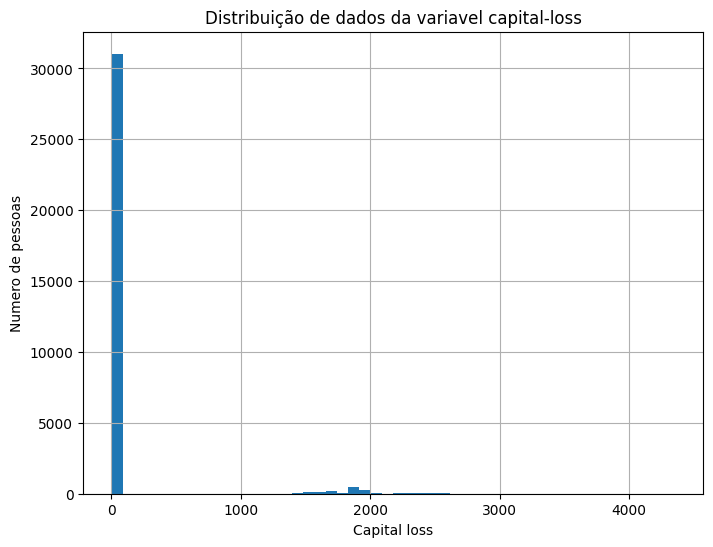

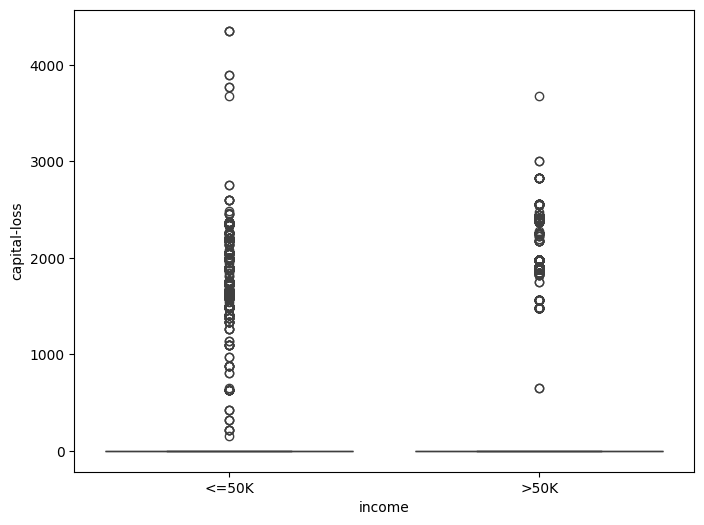

In [18]:
variavel='capital-loss'
analise_variavel_continua(df_treino, variavel)

ax=df_treino[variavel].hist(bins=50)
ax.set_title('Distribuição de dados da variavel '+variavel)
ax.set_ylabel('Numero de pessoas')
ax.set_xlabel('Capital loss')
plt.show()

sns.boxplot(y='capital-loss', x='income', data=df_treino)
plt.show()

### 2.10 Variavel hours-per-week
> Horas de trabalho por semana 

__count:__ 32561\
__null:__ 0\
__mean:__ $40.44 horas\
__std:__ $12.35 horas\
__min:__ $1 horas\
__25%:__ $40 horas\
__50%:__ $40 horas\
__75%:__ $45 horas\
__max:__ $99 horas


* Variavel numerica com outliers
* Sem valores ausentes ou nulos 
* Distribuição desbalanceada , com grande concetração de pessoas que trabalham entre 40 e 45 horas por semana 
* Em relação ao relacionamento da variavel hours-per-week e class, notamos pessoas que trabalham mais horas por semana tendem a ganhar %50K
* Entretanto,existem casos de pessoas que possuem altos  valores de hours-per-week e tendem a ganhar menos ou igual a $50.

[↩️ Retornar ao índice](#indice)

Distribuição de dados da variavel  hours-per-week:
hours-per-week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
87        1
94        1
82        1
92        1
74        1
Name: count, Length: 94, dtype: Int64

Porcentagem da distribuição dos dados da variavel  hours-per-week:
hours-per-week
40    0.467338
50    0.086576
45    0.056018
60      0.0453
35    0.039833
        ...   
87    0.000031
94    0.000031
82    0.000031
92    0.000031
74    0.000031
Name: proportion, Length: 94, dtype: Float64

Total de valores unicos da variavel hours-per-week: 94



count      32561.0
mean     40.437456
std      12.347429
min            1.0
25%           40.0
50%           40.0
75%           45.0
max           99.0
Name: hours-per-week, dtype: Float64

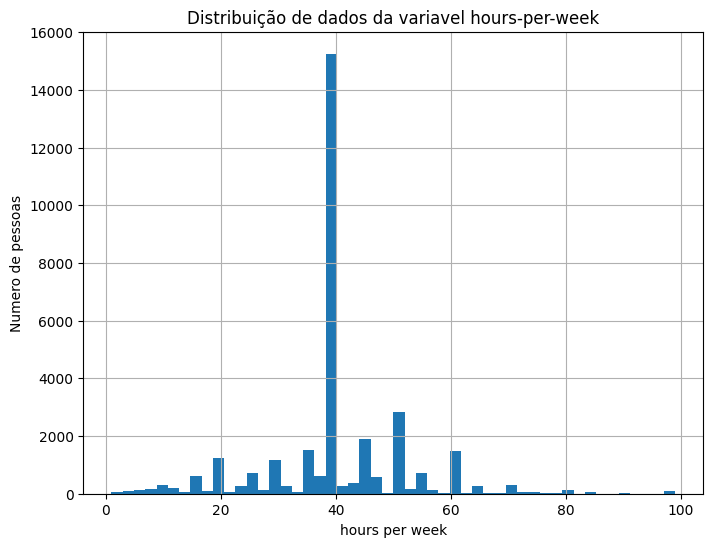

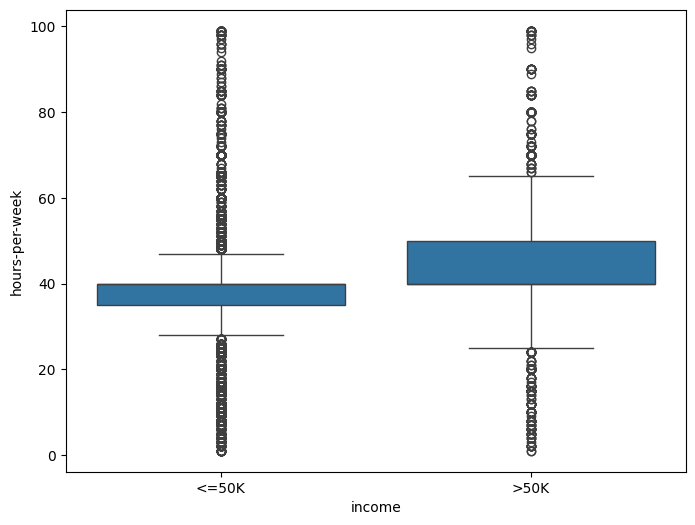

Porcentagem de pessoas que trabalham  Menos que 40 horas por semana e fazem  >$50K/yr:  0.0
Porcentagem de pessoas que trabalham  Menos que 40 horas por semana e fazem  <=$50K/yr:  0.0
Porcentagem de pessoas que trabalham  Entre 40 and 45 horas por semana e fazem  >$50K/yr:  0.0
Porcentagem de pessoas que trabalham  Entre 40 and 45 horas por semana e fazem  <=$50K/yr:  0.0
Porcentagem de pessoas que trabalham  Mais que 45 horas por semana e fazem  >$50K/yr:  0.0
Porcentagem de pessoas que trabalham  Mais que 45 horas por semana e fazem  <=$50K/yr:  0.0


In [19]:
variavel='hours-per-week'
analise_variavel_continua(df_treino, variavel)

ax=df_treino[variavel].hist(bins=50)
ax.set_title('Distribuição de dados da variavel '+variavel)
ax.set_ylabel('Numero de pessoas')
ax.set_xlabel('hours per week')
plt.show()

sns.boxplot(y='hours-per-week', x='income', data=df_treino)
plt.show()

print('Porcentagem de pessoas que trabalham  Menos que 40 horas por semana e fazem  >$50K/yr: ', len(df_treino[(df_treino['hours-per-week']<40) & (df_treino['income']==' >50K')])/len(df_treino)*100)
print('Porcentagem de pessoas que trabalham  Menos que 40 horas por semana e fazem  <=$50K/yr: ', len(df_treino[(df_treino['hours-per-week']<40) & (df_treino['income']==' <=50K')])/len(df_treino)*100)
print('Porcentagem de pessoas que trabalham  Entre 40 and 45 horas por semana e fazem  >$50K/yr: ', len(df_treino[((df_treino['hours-per-week'] >= 40) & (df_treino['hours-per-week'] <= 45)) & (df_treino['income']==' >50K')])/len(df_treino)*100)
print('Porcentagem de pessoas que trabalham  Entre 40 and 45 horas por semana e fazem  <=$50K/yr: ', len(df_treino[((df_treino['hours-per-week'] >= 40) & (df_treino['hours-per-week'] <= 45)) & (df_treino['income']==' <=50K')])/len(df_treino)*100)
print('Porcentagem de pessoas que trabalham  Mais que 45 horas por semana e fazem  >$50K/yr: ', len(df_treino[(df_treino['hours-per-week'] > 45) & (df_treino['income']==' >50K')])/len(df_treino)*100)
print('Porcentagem de pessoas que trabalham  Mais que 45 horas por semana e fazem  <=$50K/yr: ', len(df_treino[(df_treino['hours-per-week'] > 45) & (df_treino['income']==' <=50K')])/len(df_treino)*100)

### 2.11 Variavel native-country

* Variavel categorica com 42 paises distintos
* Sem valores ausentes ou nulos. Entretanto, existe uma categoria "?", que deve indicar um tipo de pais desconhecido
* Distribuição muito desbalanceada , onde 89,6%(29170) das pessoas são dos United States
* Considerando a vasta quantidade de dados das pessoas que morando nos United States compado com outros paises, não é possivel observar claramento a tendencia dessas pessoas ganharem $50K

[↩️ Retornar ao índice](#indice)

valores dos dados pela classe de variavel  native-country:
native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                 

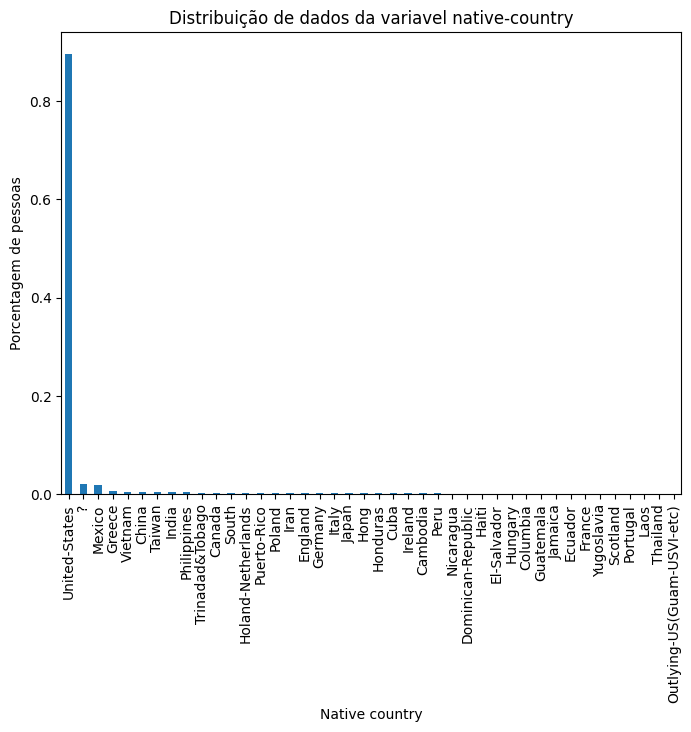

income,<=50K,>50K
native-country,,
?,0.749571,0.250429
Cambodia,0.631579,0.368421
Canada,0.677686,0.322314
China,0.733333,0.266667
Columbia,0.966102,0.033898
Cuba,0.736842,0.263158
Dominican-Republic,0.971429,0.028571
Ecuador,0.857143,0.142857
El-Salvador,0.915094,0.084906


In [20]:
variavel='native-country'
analise_variavel_categorica(df_treino, variavel)

##plot distribution
ax=df_treino[variavel].value_counts(normalize=True).plot.bar()
ax.set_title('Distribuição de dados da variavel '+variavel)
ax.set_ylabel('Porcentagem de pessoas')
ax.set_xlabel('Native country')
ax.set_xticklabels(labels=df_treino['native-country'].unique().tolist())
plt.show()

pd.crosstab([df_treino['native-country']], df_treino['income'], normalize='index') #normaliza em cada linha

### 2.12 Relacionamento entre as variaveis 

### 2.12.1 relacionamento entre as variaveis sex-race-income-e-numericas
* na media, é possivel notar que independente do sexo e raça , pessoas mais velhas, com maior escolaridade , maiores ganhos de capital e que trabalham mais horas por semana tendem a ganhar mais de $50K quando comparado com os outros

[↩️ Retornar ao índice](#indice)

In [21]:
display(df_treino.groupby(['sex', 'race', 'income']).mean(numeric_only=True))

age         fnlwgt  education-num  \
sex    race               income                                            
Female Amer-Indian-Eskimo <=50K   36.906542  109018.626168       9.392523   
                          >50K         39.0       148012.0      12.416667   
       Asian-Pac-Islander <=50K   34.227723  148165.333333      10.237624   
                          >50K    41.162791  142426.093023      11.465116   
       Black              <=50K   37.624573  213411.580205       9.416382   
                          >50K    41.588889  205806.033333      11.722222   
       Other              <=50K    31.38835  173235.932039        8.68932   
                          >50K    36.666667  160223.333333           12.5   
       White              <=50K   36.073155  183485.120961       9.902942   
                          >50K    42.281128  184030.255837      11.794747   
Male   Amer-Indian-Eskimo <=50K   36.803571  126428.767857        8.85119   
                          >50K    40.041667  120721.541667         10.625   
       Asian-Pac-Islander <=50K    37.28913  163885.130435      10.573913   
                          >50K    42.596567  170698.347639      12.570815   
       Black              <=50K   36.124214  242343.990566       9.082547   
                          >50K    44.356902  245390.356902      10.882155   
       Other              <=50K   33.552448  214891.832168       8.468531   
                          >50K    42.947368  204551.736842      11.315789   
       White              <=50K   37.285136  189950.465418         9.4671   
                          >50K    44.739859  186917.770077      11.581376   

                                  capital-gain  capital-loss  hours-per-week  
sex    race               income                                              
Female Amer-Indian-Eskimo <=50K     190.803738     16.084112       35.803738  
                          >50K     3699.333333           0.0            43.5  
       Asian-Pac-Islander <=50K           83.0     45.613861       37.138614  
                          >50K     5678.837209     87.767442        39.55814  
       Black              <=50K          106.8     41.005461       36.491468  
                          >50K     7187.122222    117.811111       42.411111  
       Other              <=50K      45.582524     38.398058       35.514563  
                          >50K          3844.0           0.0            43.0  
       White              <=50K     126.526005     49.218545       35.764513  
                          >50K     3884.992218    185.170233       40.238327  
Male   Amer-Indian-Eskimo <=50K     217.202381     23.107143       41.708333  
                          >50K     3881.666667    209.416667          45.625  
       Asian-Pac-Islander <=50K     134.954348      67.16087       39.273913  
                          >50K     5169.939914    225.429185       45.802575  
       Black              <=50K     121.119497     48.400943       38.834119  
                          >50K     3192.212121    189.902357       44.979798  
       Other              <=50K      91.328671     74.881119       41.363636  
                          >50K    11182.842105     99.315789       45.526316  
       White              <=50K     171.293619     57.495071       40.904241  
                          >50K     3941.794548    198.462145       46.460831

### 2.12.2 relacionamento entre as variaveis workclass-occupation-class-e-outras-numericas
* Na media, é possivel notar o mesmo comportamento da analise feita anteriormente
* Em geral, pessoas mais velhas , que possuem um nivel de educação mais elevada, tem um grande ganho de capital e trabalham mais horas por semana tendem a ganhar $50K quando comparado com os outros 

[↩️ Retornar ao índice](#indice)

In [22]:

display(df_treino.groupby(['occupation', 'income']).mean(numeric_only=True))

age         fnlwgt  education-num  \
occupation        income                                            
?                 <=50K   39.179177  189247.346852       9.016344   
                  >50K    55.617801  183567.052356      11.303665   
Adm-clerical      <=50K   35.987128  192856.517315      10.016549   
                  >50K    43.254438  186810.232742      10.737673   
Armed-Forces      <=50K       28.25      199302.25          9.625   
                  >50K         46.0       344415.0           14.0   
Craft-repair      <=50K   37.659621  191657.759937       8.911041   
                  >50K    43.712594  193752.881593        9.79225   
Exec-managerial   <=50K   39.609152  184837.102955      10.838894   
                  >50K    44.898374  183962.974085      12.099593   
Farming-fishing   <=50K   40.445961  174844.003413       8.425484   
                  >50K     47.06087  134618.747826      10.008696   
Handlers-cleaners <=50K   31.462617  205426.799065       8.453271   
                  >50K    42.662791  188926.383721       9.360465   
Machine-op-inspct <=50K   37.048516  196050.591324       8.362443   
                  >50K       42.388     187964.804          9.364   
Other-service     <=50K   34.664661  188806.862571       8.717226   
                  >50K    41.518248  184034.875912      10.218978   
Priv-house-serv   <=50K   41.689189  201804.986486       7.324324   
                  >50K         47.0        97883.0           13.0   
Prof-specialty    <=50K   37.942569    182426.5879      12.378343   
                  >50K    43.677246  188818.145239      13.551372   
Protective-serv   <=50K   37.705479   202127.56621       9.842466   
                  >50K    41.545024  201858.085308      10.895735   
Sales             <=50K   34.780277  190869.004124       9.904012   
                  >50K    44.336724  190931.711089      11.373347   
Tech-support      <=50K   34.355039  190725.413953      10.871318   
                  >50K    43.102473  195227.321555      11.268551   
Transport-moving  <=50K   39.120595  189970.879405       8.653093   
                  >50K    44.496875      191944.55       9.221875   

                          capital-gain  capital-loss  hours-per-week  
occupation        income                                              
?                 <=50K     158.483051     47.758475        31.41586  
                  >50K     4462.109948    170.989529       36.146597  
Adm-clerical      <=50K     136.621514     51.380938       37.032485  
                  >50K     2808.587771    121.378698       40.942801  
Armed-Forces      <=50K            0.0           0.0           40.75  
                  >50K             0.0        1887.0            40.0  
Craft-repair      <=50K     147.991483     66.569716       41.607256  
                  >50K     2360.839612    163.178687       44.682454  
Exec-managerial   <=50K     184.039085     59.199237       42.810772  
                  >50K     4478.821646    223.738313       47.308435  
Farming-fishing   <=50K     265.142207     43.268487       46.045506  
                  >50K     3070.678261    214.469565       54.208696  
Handlers-cleaners <=50K      110.85514     35.895639       37.626947  
                  >50K     2448.104651     191.05814       42.732558  
Machine-op-inspct <=50K     156.160388     48.395548       40.383562  
                  >50K        1537.772       154.988          43.364  
Other-service     <=50K      80.453452     34.113046       34.339455  
                  >50K     2746.474453    133.627737       43.051095  
Priv-house-serv   <=50K      111.22973     21.594595       32.871622  
                  >50K         25236.0           0.0            35.0  
Prof-specialty    <=50K     191.931609     66.034196       40.110478  
                  >50K     5836.869285    222.158687       45.179666  
Protective-serv   <=50K     245.623288     46.394977       41.579909  
                  >50K     1668.118483    144.63

### 3.0 Engenharia de Atributos

#### 3.1 Variaveis Categoricas



> Operações de melhoria
1. Transformação das variaveis com 2 classes para variavel binaria: class e sex
2. Variavel workclass: Criação de variavel workclass_simplifica combinando duas classes similares (Without-pay e Never-worked)
3. Variavel occupation : Criação de uma variavel occupation_simplificada combinando duas classes similares ('?' and Other-service)
4. Variavel marital_status : Criação de uma variavel marital_status_simplificada combinando duas classes similares (Married-civ-spouse and Married-AF-spouse) 
5. Variavel relationship : Criação de uma variavel relationship_simplificada combinando duas classes similares (Husband and Wife) 
6. Variavel race : Criação de uma variavel race_simplificada combinando todas as classes distintas de branco 
7. Variavel native-country : Criação de uma variavel native-country_simplificada criando 5 classes de continente.
8. Transformação das variaveis categoricas em numericas atraves da estrategia one-hot-encoding

[↩️ Retornar ao índice](#indice)

In [23]:
##categorical features
df_treino=pd.get_dummies(df_treino, columns=['income', 'sex'], drop_first=True) #Transformação binaria

df_treino['workincome_simplificada']=df_treino['workincome'].apply(lambda variavel:' WO_pay' if variavel==' Without-pay' or variavel==' Never-worked' else variavel )

df_treino['occupation_simplificada']=df_treino['occupation'].apply( lambda variavel:' Other-service' if variavel==' Armed-Forces' or variavel=='?' or variavel=='Other-service' else variavel)

def status_married(variavel):
  #Combinação das incomees similares
  if variavel==' Married-civ-spouse' or variavel==' Married-AF-spouse':
    return ' Married'
  elif variavel==' Never-married':
    return variavel
  else:
    return ' No-spouse'

df_treino['marital-status_simplificada']=df_treino['marital-status'].map(status_married)



def grupos_race(variavel):
  #Agrupando algumas incomees
  if variavel==' White':
    return variavel
  else:
    return ' Other'

df_treino['race_simplificada']=df_treino['race'].map(grupos_race)

def grupos_relacionamento(variavel):
  #Agrupando incomees similares
  if variavel==' Husband' or variavel==' Wife':
    return ' Spouse'
  else:
    return variavel
df_treino['relationship_simplificada']=df_treino['relationship'].map(grupos_relacionamento)


def grupos_paises(val):
  #Agrupando paises em continentes
  if val==' United-States':
    return val
  elif val in [' Mexico', ' Cuba', ' Jamaica', ' Puerto-Rico', ' Honduras', ' Columbia', ' Ecuador', ' Guatemala', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Haiti',
               ' Dominican-Republic', ' El-Salvador', ' Trinadad&Tobago', ' South']:
    return ' America'
  elif val in [' England', ' Canada', ' Germany', ' Italy', ' Poland',  ' Portugal', ' France', ' Greece',  ' Ireland', ' Hungary', ' Yugoslavia', ' Holand-Netherlands',
               ' Scotland']:
    return ' Europe'
  elif val in [' India', ' Philippines', ' Iran', ' Cambodia', ' Thailand', ' Laos', ' Taiwan', ' China', ' Japan', ' Vietnam', ' Hong']:
    return ' Asia'
  else:
    return ' ?'

df_treino['native-country_simplificada']=df_treino['native-country'].map(grupos_paises)


df_treino=pd.get_dummies(df_treino, columns=['workincome_simplificada', 'occupation_simplificada', 'marital-status_simplificada', 'relationship_simplificada', 'race_simplificada', 'native-country_simplificada'], drop_first=True)

#### 3.2 Variaveis Numericas

* Padronização das variaveis numericas age, fnlwgt, education-num, capital-gain, capital-loss and hours-per-week.

[↩️ Retornar ao índice](#indice)

In [24]:
variavel=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df_treino=padronizacao_variavel(df_treino,variavel)

In [25]:
df_treino.head(5)

,age,workincome,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,sex_Male,workincome_simplificada_Federal-gov,workincome_simplificada_Local-gov,workincome_simplificada_Never-worked,workincome_simplificada_Private,workincome_simplificada_Self-emp-inc,workincome_simplificada_Self-emp-not-inc,workincome_simplificada_State-gov,workincome_simplificada_Without-pay,occupation_simplificada_Adm-clerical,occupation_simplificada_Armed-Forces,occupation_simplificada_Craft-repair,occupation_simplificada_Exec-managerial,occupation_simplificada_Farming-fishing,occupation_simplificada_Handlers-cleaners,occupation_simplificada_Machine-op-inspct,occupation_simplificada_Priv-house-serv,occupation_simplificada_Prof-specialty,occupation_simplificada_Protective-serv,occupation_simplificada_Sales,occupation_simplificada_Tech-support,occupation_simplificada_Transport-moving,relationship_simplificada_Not-in-family,relationship_simplificada_Other-relative,relationship_simplificada_Own-child,relationship_simplificada_Unmarried,relationship_simplificada_Wife
0,3.769612,?,-1.067997,HS-grad,-0.420060,Widowed,?,Not-in-family,White,-0.14592,10.593507,-0.035429,United-States,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,3.183112,Private,-0.539169,HS-grad,-0.420060,Widowed,Exec-managerial,Not-in-family,White,-0.14592,10.593507,-1.817204,United-States,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,2.010110,?,-0.035220,Some-college,-0.031360,Widowed,?,Unmarried,Black,-0.14592,10.593507,-0.035429,United-States,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,1.130359,Private,-0.468215,7th-8th,-2.363558,Divorced,Machine-op-inspct,Unmarried,White,-0.14592,9.461864,-0.035429,United-States,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
4,0.177296,Private,0.709482,Some-college,-0.031360,Separated,Prof-specialty,Own-child,White,-0.14592,9.461864,-0.035429,United-States,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False


## 4.0 Correlacao entre as variaveis 

* Em geral, observamos que entre todas as variaveis do dataset não esta presente forte correlação entre elas 
* A maior correlação positiva observada é entre as variáveis education-num e hours-per-week (0.15), sugerindo que pessoas com maior nível educacional tendem a trabalhar mais horas por semana.
* Uma leve correlação negativa entre fnlwgt e age (-0.08) pode indicar que, na amostra observada, indivíduos mais velos têm pesos amostrais (final weight) menores, ainda que essa relação seja fraca.
* Algumas variáveis, como capital-gain e fnlwgt (0.00), não apresentam nenhuma correlação significativa entre si.

[↩️ Retornar ao índice](#indice)

<Axes: >

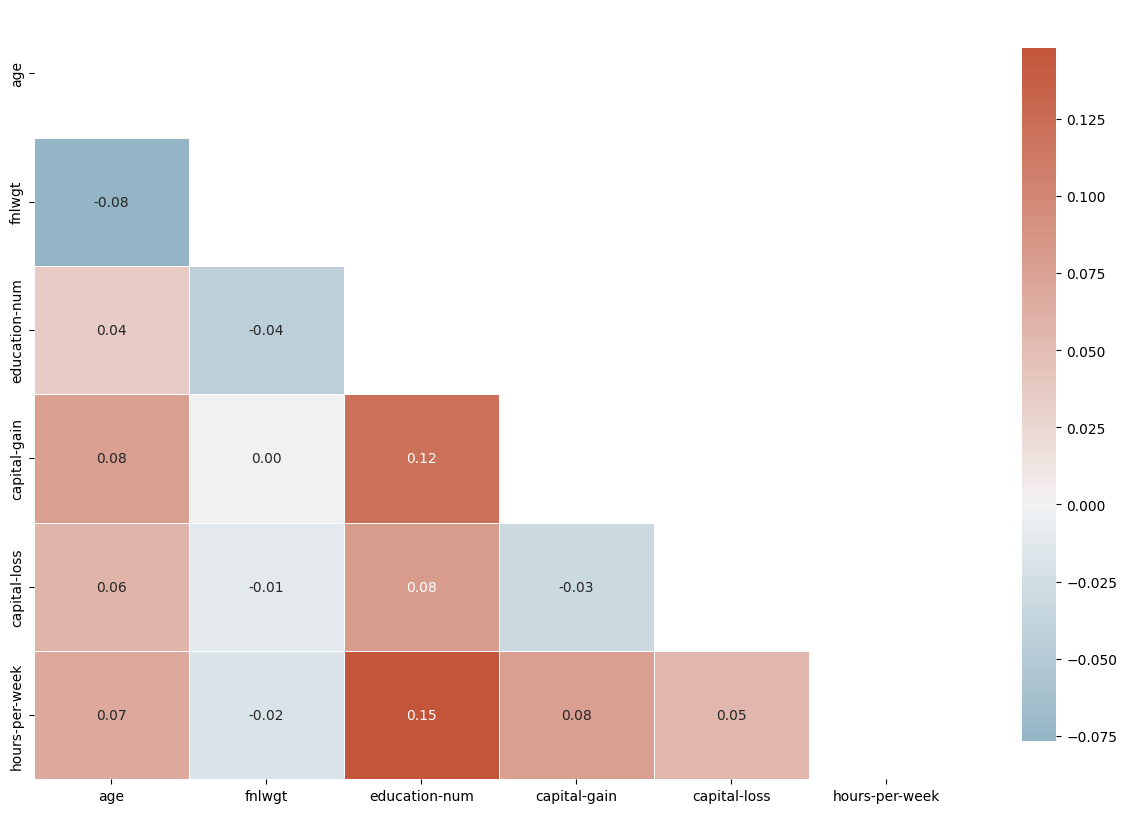

In [26]:
# Selecionar apenas colunas numéricas
df_numerico = df_treino.select_dtypes(include='number')

# Calcular a correlação apenas entre colunas numéricas
correlacao = df_numerico.corr()

# Criar a máscara para o triângulo superior
mask = np.triu(np.ones_like(correlacao, dtype=bool))

# Configurar a figura
f, ax = plt.subplots(figsize=(15, 10))

# Gerar um colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Gerar o heatmap com a correlação correta
sns.heatmap(correlacao, mask=mask, cmap=cmap, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .9}, annot=True, fmt='.2f')


In [27]:
print(df_treino.columns)

variaveis=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week',
       'sex_ Male',
       'workincome_simplificada_ Federal-gov',
       'workincome_simplificada_ Local-gov',
       'workincome_simplificada_ Private',
       'workincome_simplificada_ Self-emp-inc',
       'workincome_simplificada_ Self-emp-not-inc',
       'workincome_simplificada_ State-gov',
       'workincome_simplificada_ WO_pay',
       'occupation_simplificada_ Craft-repair',
       'occupation_simplificada_ Exec-managerial',
       'occupation_simplificada_ Farming-fishing',
       'occupation_simplificada_ Handlers-cleaners',
       'occupation_simplificada_ Machine-op-inspct',
       'occupation_simplificada_ Other-service',
       'occupation_simplificada_ Priv-house-serv',
       'occupation_simplificada_ Prof-specialty',
       'occupation_simplificada_ Protective-serv',
       'occupation_simplificada_ Sales',
       'occupation_simplificada_ Tech-support',
       'occupation_simplificada_ Transport-moving',
       'marital-status_simplificada_ Never-married',
       'marital-status_simplificada_ No-spouse',
       'relationship_simplificada_ Other-relative',
       'relationship_simplificada_ Own-child',
       'relationship_simplificada_ Spouse',
       'relationship_simplificada_ Unmarried',
       'race_simplificada_ White',
       'native-country_simplificada_ America',
       'native-country_simplificada_ Asia',
       'native-country_simplificada_ Europe',
       'native-country_simplificada_ United-States']

print(len(variaveis))

Index(['age', 'workincome', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income_>50K',
       'sex_Male', 'workincome_simplificada_Federal-gov',
       'workincome_simplificada_Local-gov',
       'workincome_simplificada_Never-worked',
       'workincome_simplificada_Private',
       'workincome_simplificada_Self-emp-inc',
       'workincome_simplificada_Self-emp-not-inc',
       'workincome_simplificada_State-gov',
       'workincome_simplificada_Without-pay',
       'occupation_simplificada_Adm-clerical',
       'occupation_simplificada_Armed-Forces',
       'occupation_simplificada_Craft-repair',
       'occupation_simplificada_Exec-managerial',
       'occupation_simplificada_Farming-fishing',
       'occupation_simplificada_Handlers-cleaners',
       'occupation_simplificada_Machine-op-inspct',
       'occupation_simplificada_Priv-house-serv',
     

In [28]:

X = df_treino.drop(['income_>50K'],axis=1)
y = df_treino['income_>50K']